# Foundation+YSE z-band Hubble Diagram

In this notebook, we re-create the sample and Hubble diagram in Hayes+2024. If you find this resource or the associated paper useful for your work, please cite: .

In [1]:
# Imports
import matplotlib.pyplot as plt
import astropy.table as at

from py import utils

plt.style.use('./stylesheet/zband.mplstyle')

In [2]:
# Read data table and apply default cuts, as specified in Hayes+24
full_data = at.Table.read('../tables/full.csv', format='csv')
sample = utils.apply_data_cuts(full_data, print_summary=True)

sample['SIGMA_Z'][sample['SIGMA_Z'] < 0.] = 0.01         # Set the uncertainty on redshifts derived from SN spectra to 0.01

Total Spec Sample:               517 (YSE: 292, Foundation: 225)
Normal Ias:                      446 (YSE: 266, Foundation: 180)
0.015 < z < 0.1:                 344 (YSE: 182, Foundation: 162)
(z < 0.08 for Foundation)
gri Data Requirement:            229 (YSE: 114, Foundation: 115)
z-band Data Requirement:         168 (YSE: 54, Foundation: 114)
Reduced Chi Squared < 3:         162 (YSE: 51, Foundation: 111)
T0 Cut:                          145 (YSE: 40, Foundation: 105)
Av < 1:                          145 (YSE: 40, Foundation: 105)
-1.5 < theta < 3:                144 (YSE: 39, Foundation: 105)
Host Mass Estimate:              141 (YSE: 37, Foundation: 104)

Final Sample:                    141 (YSE: 37, Foundation: 104)
* For complete description of the default data cuts, see Hayes+2024.


## Hubble Diagram

Re-create the Hubble diagram in Figure N from Hayes+2024 using the `plot_hubble_diagram` function. The Hubble diagram in this notebook is made from the BayeSN fits to the full griz light curves. You may adjust which BayeSN fit is used (i.e. to the griz data, gri data, or z-band only data) with the `key` argument.

The `plot_hubble_diagram` function will display the RMS of the Hubble residuals for the chosen sample in the lower right hand corner of the plot.

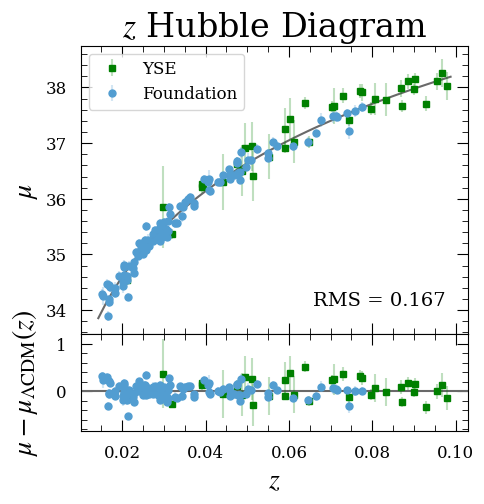

In [3]:
fit_flts = 'z'              # The data used in the BayeSN fits from which the Hubble diagram is constructed.
                            # Select from 'griz', 'gri', or 'z'.
dust_corrected = True       # If you choose 'z', you can correct for dust, or leave the distance modulus uncorrected for dust.
                            # Default is to correct the distance modulus from single band fits for dust.
                            # If you do not correct for dust, you will see an offset from the Lambda CDM cosmological distances shown in gray.
fig, ax = utils.plot_hubble_diagram(sample, fit_filters=fit_flts, dust_corrected=dust_corrected)  # Plot the Hubble diagram!